In [ ]:
# LSTM- RNN 심화버전 사용해보기

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#하이퍼 파라미터 설정

In [57]:
PAST = 12
SPLIT = 0.8
NEURON = 500
RNN_SAHPE = (PAST,1)
EPOCH = 100
BATCH = 64

# 데이터 로딩 및 스케일링

In [58]:
df = pd.read_csv("airline.csv",header=None) # 열제목 쓸데없는거 들어가있음
print(df.shape)
display(df.head())

(144, 2)


,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [59]:
df = df[[1]]
display(df.head())

,1
0,112
1,118
2,132
3,129
4,121


In [60]:
raw_DB = np.array(df).astype(float)
print(raw_DB.flatten())

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [61]:
scaler = MinMaxScaler()
raw_DB = scaler.fit_transform(raw_DB)

# Timestep 데이터 생성 및 학습/평가 데이터 분할

In [62]:
data = []
for i in range(len(raw_DB)-PAST):
    data.append(raw_DB[i:i+PAST+1]) # 1ST:1~12, 2ND:1~13, 3RD:2~14
reshaped_data = np.array(data)

In [63]:
print(reshaped_data.shape)
np.random.shuffle(reshaped_data)
print(reshaped_data[0])

(132, 13, 1)
[[0.4980695 ]
 [0.58108108]
 [0.6042471 ]
 [0.55405405]
 [0.60810811]
 [0.68918919]
 [0.71042471]
 [0.83204633]
 [1.        ]
 [0.96911197]
 [0.77992278]
 [0.68918919]
 [0.55212355]]


- 입력값과 출력값으로 분리
>- 인덱스 0~11 (12months)를 입력값으로 사용
>- 12번째 인덱스를 출력 값으로 사용

In [64]:
x_data = reshaped_data[:,:PAST]
y_data = reshaped_data[:,-1]

split_boundary = int(reshaped_data.shape[0] * SPLIT)
x_train = x_data[:split_boundary]
x_test = x_data[split_boundary:]
y_train = y_data[:split_boundary]
y_test = y_data[split_boundary:]

In [65]:
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (105, 12, 1)
x_test shape :  (27, 12, 1)
y_train shape :  (105, 1)
y_test shape :  (27, 1)


# 모델 생성
- LSTM(unit, input_shape = (time_step,feature))
  unit : hidden state의 크기, 임의의 개수를 설정
  time_step : 과거 몇 개의 데이터를 학습할 것인지 설정
  feature : 입력값 x의 차원(여행객 수만 고려하기 때문에 특성 차원 수는 1)

In [66]:
model = Sequential()
model.add(LSTM(units=NEURON, input_shape=RNN_SAHPE))
model.add(Dense(units=NEURON, activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 500)               1004000   
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 1255001 (4.79 MB)
Trainable params: 1255001 (4.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=EPOCH,batch_size=BATCH)

Epoch 1/100
2/2 [==============================] - 4s 205ms/step - loss: 0.1169 - mae: 0.2883
Epoch 2/100
2/2 [==============================] - 1s 252ms/step - loss: 0.0221 - mae: 0.1076
Epoch 3/100
2/2 [==============================] - 0s 138ms/step - loss: 0.0168 - mae: 0.1039
Epoch 4/100
2/2 [==============================] - 0s 69ms/step - loss: 0.0194 - mae: 0.1000
Epoch 5/100
2/2 [==============================] - 0s 140ms/step - loss: 0.0168 - mae: 0.0942
Epoch 6/100
2/2 [==============================] - 0s 74ms/step - loss: 0.0089 - mae: 0.0723
Epoch 7/100
2/2 [==============================] - 0s 151ms/step - loss: 0.0134 - mae: 0.0980
Epoch 8/100
2/2 [==============================] - 0s 93ms/step - loss: 0.0091 - mae: 0.0784
Epoch 9/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0086 - mae: 0.0675
Epoch 10/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0114 - mae: 0.0746
Epoch 11/100
2/2 [==============================] - 0s 126ms/st

1/1 [==============================] - 1s 658ms/step


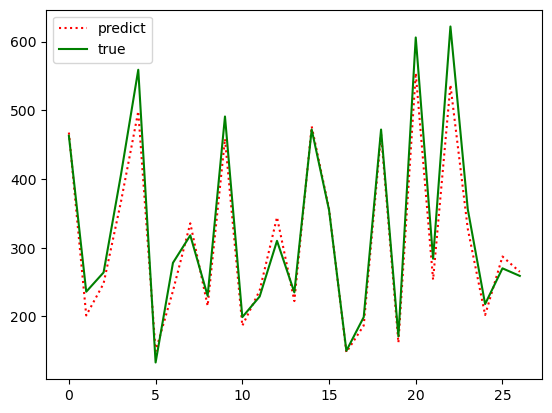

In [68]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform(y_test)
plt.plot(pred,'r:',label='predict')
plt.plot(y_test,'g-',label='true')
plt.legend()
plt.show()